# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Index No: 190643G                                       
### Name: Vakeesan.K
GitHub Link: https://github.com/vakeesanvk/image_processing_assignment03

### Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1.Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

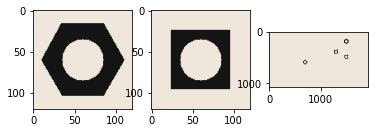

In [110]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR) #hex nut
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR) #square nut
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR) #conveyor image

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

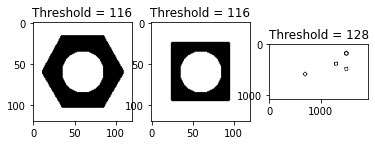

In [111]:
hexnut_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
hex_blur = cv.GaussianBlur(hexnut_gray,(5,5),0)
ret1,hex_thr = cv.threshold(hex_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

sqrnut_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
sqr_blur = cv.GaussianBlur(sqrnut_gray,(5,5),0)
ret2,sqr_thr = cv.threshold(sqr_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

conveyor_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
con_blur = cv.GaussianBlur(conveyor_gray,(5,5),0)
ret3,con_thr = cv.threshold(con_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hex_thr, cv.COLOR_RGB2BGR))
ax[0].set_title("Threshold = %i"%ret1)
ax[1].imshow(cv.cvtColor(sqr_thr, cv.COLOR_RGB2BGR))
ax[1].set_title("Threshold = %i"%ret2)
ax[2].imshow(cv.cvtColor(con_thr, cv.COLOR_RGB2BGR))
ax[2].set_title("Threshold = %i"%ret3)
plt.show()

3. Carry out morphological closing to remove small holes inside the foreground. Use a 3 Ã— 3 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

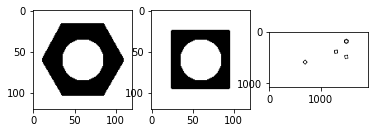

In [112]:
kernel = np.ones((3, 3), np.uint8)
hex_clo = cv.morphologyEx(hex_thr, cv.MORPH_CLOSE, kernel)
sqr_clo = cv.morphologyEx(sqr_thr, cv.MORPH_CLOSE, kernel)
con_clo = cv.morphologyEx(con_thr, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hex_clo, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(sqr_clo, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(con_clo, cv.COLOR_RGB2BGR))
plt.show()

4. Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
* How many connected components are detected in each image?
* What are the statistics? Interpret these statistics.
* What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.

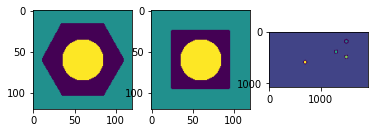

Q1)
    Connected components in picture 1 = 3
    Connected components in picture 2 = 3
    Connected components in picture 3 = 6
Q2)
    Statistics have five parts which are,
    1. The leftmost (x) coordinate of the bounding box.
    2. The topmost (y) coordinate of the bounding box.
    3. The horizontal size of the bounding box
    4. The vertical size of the bounding box
    5. The total area (in pixels) of the connected component
Q3)
    Picture 1 Centroids (x = 59.83, y = 59.22) 
    Picture 2 Centroids (x = 59.20, y = 59.20) 
Q4)
    Hexnut_template's area in pixels = 4726


In [115]:
img=[hex_clo,sqr_clo,con_clo]
img_details=[]
fig, ax = plt. subplots(1,3)
for i in range(3):
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(img[i])
    colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_VIRIDIS)
    img_details.append([retval,labels,stats,centroids,colormapped])
    ax[i].imshow(cv.cvtColor(colormapped, cv.COLOR_RGB2BGR))
plt.show()

print("Q1)")
for i in range(3):print("    Connected components in picture %i = %i"%(i+1,len(img_details[i][2])))
print("Q2)");print("    Statistics have five parts which are,");print("    1. The leftmost (x) coordinate of the bounding box.");print("    2. The topmost (y) coordinate of the bounding box.");print("    3. The horizontal size of the bounding box");print("    4. The vertical size of the bounding box");print("    5. The total area (in pixels) of the connected component")
print("Q3)")
for i in range(2):print("    Picture %i Centroids (x = %.2f, y = %.2f) "%(i+1,img_details[i][3][0][0],img_details[i][3][0][1]))
print("Q4)");print('    Hexnut_template\'s area in pixels =',img_details[0][2][0][4])

5. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

Display these contours. You should see something like the following:

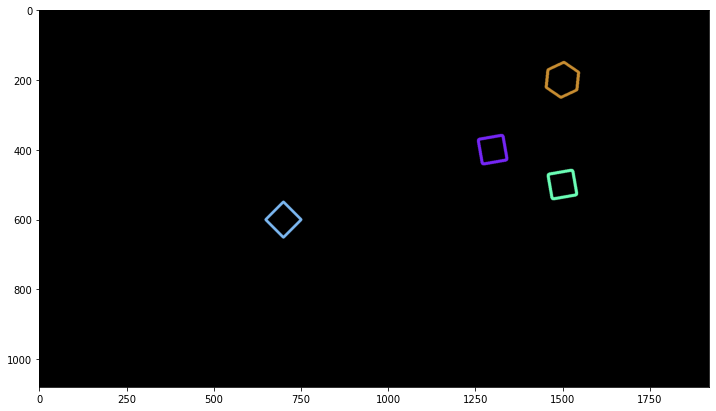

In [246]:
import random as rng
contour_list=[]
mask = np.zeros(img_details[2][4].shape,np.uint8)
contours, hierarchy = cv.findContours(con_clo, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
for i,contour in enumerate (contours):
    if(i%2!=0):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(mask, contour, -1,color, 7)
        contour_list.append(contour)
plt.figure(figsize=(12,12))
plt.imshow(cv.cvtColor(mask, cv.COLOR_RGB2BGR))
plt.show()

### Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [79]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

Number of Hexagonal nuts = 1 


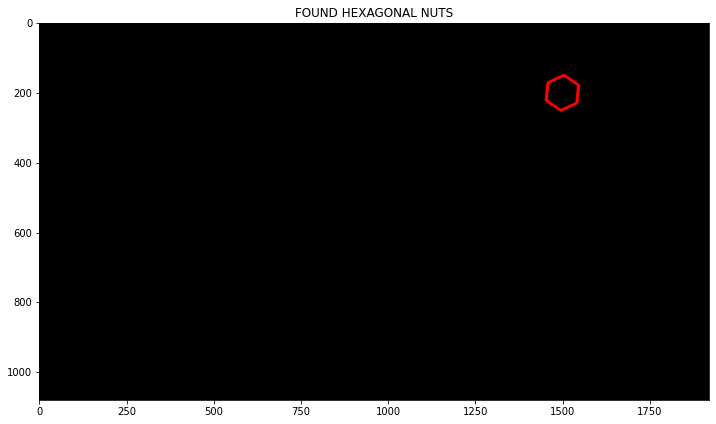

In [257]:
hex_contour, hierarchy = cv.findContours(hex_clo, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
count=0
mask2 = np.zeros(img_details[2][4].shape,np.uint8)
for i,contour in enumerate(contour_list):
    ret = cv.matchShapes(hex_contour[1],contour,1,0.0)
    if ret<0.01:
        cv.drawContours(mask2, contour, -1,(0,0,255), 7)
        count+=1

print( "Number of Hexagonal nuts = %i "%count)
plt.figure(figsize=(12,12))
plt.imshow(cv.cvtColor(mask2, cv.COLOR_RGB2BGR))
plt.title("FOUND HEXAGONAL NUTS")
plt.show()

Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [121]:
#define the essestial values
offset=20   #allowable band to detect whether the centorids crossed or not
liney1=0   # line detector's upper y value
liney2=1200 #line detetor's lower y value
hex_count=0 #count the hex nut
sqr_count=0 #count the sqr nut
linex=1600 #line detetctor's x value
frame_array=[] #container to store the created frame in order to write it later
hex_detect=[] #detect the hex nut and store it
sqr_detect=[] #deettct the sqr nut and save it

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0 #frames count
frame = []  

kernel = np.ones((3, 3), np.uint8)
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    conveyor_gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY) #change the image to gray
    con_blur = cv.GaussianBlur(conveyor_gray,(5,5),0) #gaussian blur to reduce noise
    ret3,con_thr = cv.threshold(con_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #otsu thresholding fro binariizng
    con_clo = cv.morphologyEx(con_thr, cv.MORPH_CLOSE, kernel) #morphological close to create perfect connected region
    contours, hierarchy = cv.findContours(con_clo, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) #fin the contours around the connected region
    cv.line(frame,(linex,liney1),(linex,liney2),(255,127,0),3) #line detetector
    sqr_count_current=0 #store the current sqr nut's count on a single frame
    hex_count_current=0 #store the hex nut;s count on a single frame
    
    for i,contour in enumerate (contours):
        if(i%2!=0): 
            area=cv.contourArea(contour)
            if((area > 5000)  and (area < 5200)): #5000< Sqr nut area <5200
                sqr_count_current+=1
                (x,y,w,h) = cv.boundingRect(contour)
                cv.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
                center=x+w//2,y+h//2 #can be found from cv.connectcomponentsStats->centroids
                sqr_detect.append(center)
                cv.circle(frame,center,4,(0,0,255),-1) #show the centroid
                for (x,y) in sqr_detect:
                    if x<(linex + offset) and x>(linex):
                        sqr_count+=1
                        cv.line(frame,(linex,liney1),(linex,liney2),(0,127,255),20)
                    sqr_detect.remove((x,y)) #remove not to count another time
                
            if((area > 6500) and (area < 7500)):  #6000 < hex area area < 7500
                hex_count_current+=1
                (x,y,w,h) = cv.boundingRect(contour)
                cv.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 255), 2)
                center=center=x+w//2,y+h//2
                hex_detect.append(center) #can be found from cv.connectcomponentsStats->centroids
                cv.circle(frame,center,4,(0,0,255),-1) 
                for (x,y) in hex_detect:
                    if x<(linex + offset) and x>(linex):
                        hex_count+=1
                        cv.line(frame,(linex,liney1),(linex,liney2),(0,127,255),20)
                    hex_detect.remove((x,y)) #remove not to count another time
        
    f += 1 #frame count
    cv.rectangle(frame,(80,50),(100+850,50+90),(255,255,255),-1)
    text1 = 'Frame: ' + str(f)  #put the frame count on each frame
    #Total nuts =hex,sqr
    cv.putText(frame,text1 , (100, 30), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    text2=   "Total Hex Nut:      "+str(hex_count)         +"  Total Square Nut:      "+str(sqr_count)
    #Nut count in current frame
    cv.putText(frame,text2 , (100, 80), cv.FONT_HERSHEY_COMPLEX, 1, (128,0,128), 1, cv.LINE_AA)
    text3 =  "Hex Nut on Frame: "+ str(hex_count_current)+"  Square Nut on Frame: "+str(sqr_count_current)
    cv.putText(frame,text3 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,128,0), 1, cv.LINE_AA)
    #add the farmein to frame_arry to write it later
    frame_array.append(frame)
    cv.imshow('Conveyor', frame) #view the video in real time

    if cv.waitKey(1) == ord('q'):  #press Q to stop
        break

cap.release()
cv.destroyAllWindows()

#video writing
shape = (1080, 1920, 3)
out = cv.VideoWriter('./conveyor_result_190643G.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
